In [1]:
import matplotlib.pyplot as plt
import numpy as np

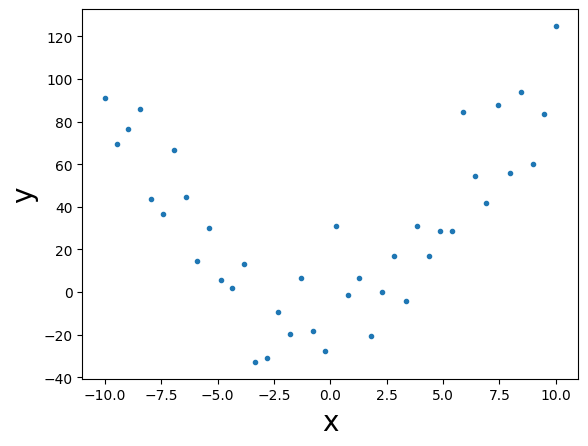

In [2]:
# No randomness

np.random.seed(42)

#Generate N points for training data

N = 40

# get 1000 equally spaced points between -10 and 10
x = np.linspace(-10, 10, N)

# calculate the y value for each element of the x vector
y = x**2 + 2*x + 1 + np.random.normal(0,20,N)

def plotdata():
    fig, ax = plt.subplots()
    plt.xlabel("x", fontsize=20)
    plt.ylabel("y", fontsize=20)
    ax.plot(x, y,'.')
    
plotdata()
plt.show()

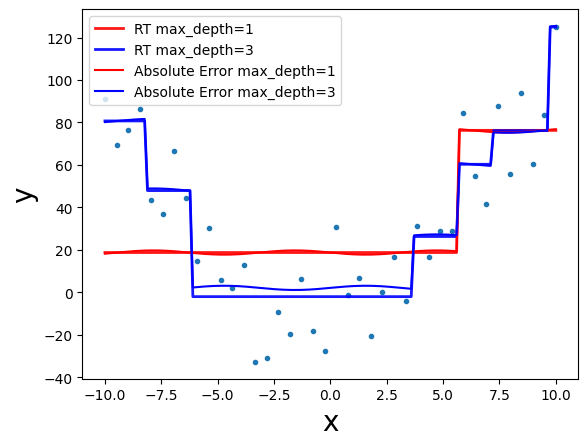

In [8]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined the plotdata() function, x_train, y_train, new_x, and N

# Reshape x:
x_train = x[:, np.newaxis]
y_train = y[:, np.newaxis]

# Generate new_x values
new_x = np.linspace(-10, 10, 4 * N)

plotdata()

DT = DecisionTreeRegressor(max_depth=1).fit(x_train, y_train)
predictions_depth_1 = DT.predict(new_x[:, np.newaxis])
plt.plot(new_x, predictions_depth_1, label='RT max_depth=1', color='r', alpha=0.9, linewidth=2)

DT = DecisionTreeRegressor(max_depth=3).fit(x_train, y_train)
predictions_depth_3 = DT.predict(new_x[:, np.newaxis])
plt.plot(new_x, predictions_depth_3, label='RT max_depth=3', color='b', alpha=0.9, linewidth=2)

# Calculate absolute error
true_values = np.sin(new_x)  # Example: True values calculated using sine function
absolute_error_depth_1 = np.abs(predictions_depth_1 - true_values)
absolute_error_depth_3 = np.abs(predictions_depth_3 - true_values)

# Plot absolute error
plt.plot(new_x, absolute_error_depth_1, color='r', label='Absolute Error max_depth=1')
plt.plot(new_x, absolute_error_depth_3, color='b', label='Absolute Error max_depth=3')

plt.legend(loc='upper left')
plt.show()

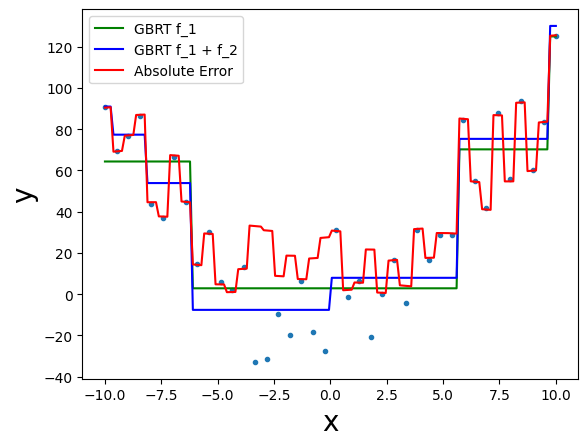

In [7]:
from itertools import islice
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have defined the plotdata() function, x_train, y, and new_x

plotdata()

DT = GradientBoostingRegressor(n_estimators=100, max_depth=2, learning_rate=1.0)
DT.fit(x_train, y)

ax = plt.gca() 

# Step through prediction as we add 10 more trees.
colorvector = ['g','b']
legendvector = ['f_1', 'f_1 + f_2']
i = 0

for pred in islice(DT.staged_predict(new_x[:, np.newaxis]), 0, 2, 1):
    plt.plot(new_x, pred, color=colorvector[i], alpha=1, label='GBRT ' + legendvector[i])
    i += 1

pred = DT.predict(new_x[:, np.newaxis])
true_values = np.sin(new_x)  # Example: True values calculated using sine function

absolute_error = np.abs(pred - true_values)  # Calculate absolute error

plt.plot(new_x, absolute_error, color='r', label='Absolute Error')

plt.legend(loc='upper left')
plt.show()

d:\app\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.88


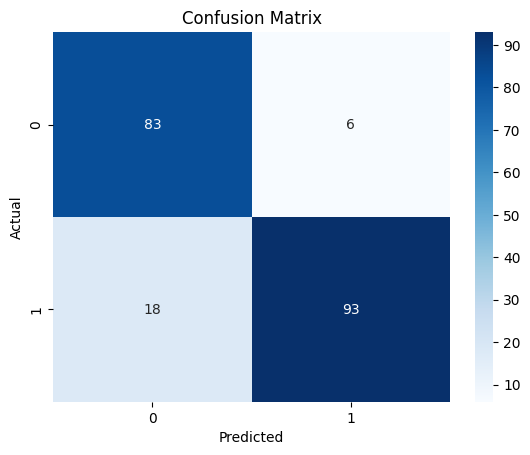

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoost classifier with Decision Tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
